In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Nashville Housing.csv')

#### Q1.. Does 'Acreage' affect the 'sale price' of the property??(WHO)
#### Q2.. What is the most expensive property and why is it so??
#### Q3.. How many properties were sold each year??
#### Q4.. Was there a circumstance when the 'total price' is greater than the  'sale price' of a property??
#### Q5.. What is the relationship between 'acreage' and 'land value'??
#### Q6.. What is the difference between 'the year the property was built ' and 'the year the property was sold'??
#### Q7.. What is the relationship between 'bedrooms', 'fullbath' and 'halfbath'??

In [3]:
data.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0


In [4]:
data.shape

(56477, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

In [6]:
data.columns

Index(['UniqueID ', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath'],
      dtype='object')

In [7]:
house_sales= data[['UniqueID ','ParcelID','LandUse','PropertyAddress','SaleDate','SalePrice','LegalReference','SoldAsVacant']]
prop_detail = data[['OwnerName','OwnerAddress','Acreage','TaxDistrict','LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath']]

In [8]:
house_sales.isna().sum()

UniqueID            0
ParcelID            0
LandUse             0
PropertyAddress    29
SaleDate            0
SalePrice           0
LegalReference      0
SoldAsVacant        0
dtype: int64

In [9]:
house_sales.shape

(56477, 8)

In [10]:
house_sales[house_sales['PropertyAddress'].isnull()== True].head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant
159,43076,025 07 0 031.00,SINGLE FAMILY,NaN,"January 15, 2016",179900,20160120-0005776,No
223,39432,026 01 0 069.00,VACANT RESIDENTIAL LAND,NaN,"October 23, 2015",153000,20151028-0109602,No
246,45290,026 05 0 017.00,SINGLE FAMILY,NaN,"March 29, 2016",155000,20160330-0029941,No
305,53147,026 06 0A 038.00,RESIDENTIAL CONDO,NaN,"August 25, 2016",144900,20160831-0091567,No
531,43080,033 06 0 041.00,SINGLE FAMILY,NaN,"January 4, 2016",170000,20160107-0001526,No


In [11]:
prop_detail.isna().sum()

OwnerName        31216
OwnerAddress     30462
Acreage          30462
TaxDistrict      30462
LandValue        30462
BuildingValue    30462
TotalValue       30462
YearBuilt        32314
Bedrooms         32320
FullBath         32202
HalfBath         32333
dtype: int64

In [12]:
prop_detail[prop_detail['OwnerName'].isna()==True].head(20)

,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = data[['PropertyAddress','LandUse','Bedrooms','FullBath','HalfBath','Acreage','LandValue','BuildingValue','TotalValue','SalePrice','SoldAsVacant','YearBuilt','SaleDate']]

In [14]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.3,50000.0,168200.0,235700.0,240000,No,1986.0,"April 9, 2013"
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,2.0,3.5,50000.0,264100.0,319000.0,366000,No,1998.0,"June 10, 2014"
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.9,50000.0,216200.0,298000.0,435000,No,1987.0,"September 26, 2016"
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.6,50000.0,147300.0,197300.0,255000,No,1985.0,"January 29, 2016"
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.0,50000.0,152300.0,202300.0,278000,No,1984.0,"October 10, 2014"


## Convert YearBuilt and SaleDate to a datetime

In [15]:
df['YearBuilt'] = df['YearBuilt'].fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         24157 non-null  float64
 3   FullBath         24275 non-null  float64
 4   HalfBath         24144 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  object 
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  float64
 12  SaleDate         56477 non-null  object 
dtypes: float64(8), object(5)
memory usage: 5.6+ MB


In [17]:
df['YearBuilt'] = df['YearBuilt'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         24157 non-null  float64
 3   FullBath         24275 non-null  float64
 4   HalfBath         24144 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  object 
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  int32  
 12  SaleDate         56477 non-null  object 
dtypes: float64(7), int32(1), object(5)
memory usage: 5.4+ MB


In [19]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.3,50000.0,168200.0,235700.0,240000,No,1986,"April 9, 2013"
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,2.0,3.5,50000.0,264100.0,319000.0,366000,No,1998,"June 10, 2014"
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.9,50000.0,216200.0,298000.0,435000,No,1987,"September 26, 2016"
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.6,50000.0,147300.0,197300.0,255000,No,1985,"January 29, 2016"
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.0,50000.0,152300.0,202300.0,278000,No,1984,"October 10, 2014"


In [20]:
df['SaleDate'] = pd.to_datetime(df['SaleDate']).dt.year

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         24157 non-null  float64
 3   FullBath         24275 non-null  float64
 4   HalfBath         24144 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  object 
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  int32  
 12  SaleDate         56477 non-null  int64  
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 5.4+ MB


In [22]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.3,50000.0,168200.0,235700.0,240000,No,1986,2013
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,2.0,3.5,50000.0,264100.0,319000.0,366000,No,1998,2014
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.9,50000.0,216200.0,298000.0,435000,No,1987,2016
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.6,50000.0,147300.0,197300.0,255000,No,1985,2016
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.0,50000.0,152300.0,202300.0,278000,No,1984,2014


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         24157 non-null  float64
 3   FullBath         24275 non-null  float64
 4   HalfBath         24144 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  object 
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  int32  
 12  SaleDate         56477 non-null  int64  
dtypes: float64(7), int32(1), int64(1), object(4)
memory usage: 5.4+ MB


## Convert SalePrice to float

In [41]:
#pops an error because there are anomalities like ',', '$'
# df['SalePrice'].astype('float')

In [42]:
df[df['SalePrice'] == '120,000']

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate


In [37]:
df['SalePrice'] = df['SalePrice'].str.replace(',','')

In [38]:
df['SalePrice'] = df['SalePrice'].str.replace('$','')

In [39]:
df[df['SalePrice'] == '120,000']

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate


In [46]:
df['SalePrice'] = df['SalePrice'].astype('float')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         24157 non-null  float64
 3   FullBath         24275 non-null  float64
 4   HalfBath         24144 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  float64
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  int32  
 12  SaleDate         56477 non-null  int64  
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 5.4+ MB


In [48]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.3,50000.0,168200.0,235700.0,240000.0,No,1986,2013
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,2.0,3.5,50000.0,264100.0,319000.0,366000.0,No,1998,2014
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.9,50000.0,216200.0,298000.0,435000.0,No,1987,2016
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3.0,3.0,0.0,2.6,50000.0,147300.0,197300.0,255000.0,No,1985,2016
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4.0,3.0,0.0,2.0,50000.0,152300.0,202300.0,278000.0,No,1984,2014


## Convert float to an integer

In [49]:
df[['Bedrooms','FullBath','HalfBath']] = df[['Bedrooms','FullBath','HalfBath']].fillna(0)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PropertyAddress  56448 non-null  object 
 1   LandUse          56477 non-null  object 
 2   Bedrooms         56477 non-null  float64
 3   FullBath         56477 non-null  float64
 4   HalfBath         56477 non-null  float64
 5   Acreage          26015 non-null  float64
 6   LandValue        26015 non-null  float64
 7   BuildingValue    26015 non-null  float64
 8   TotalValue       26015 non-null  float64
 9   SalePrice        56477 non-null  float64
 10  SoldAsVacant     56477 non-null  object 
 11  YearBuilt        56477 non-null  int32  
 12  SaleDate         56477 non-null  int64  
dtypes: float64(8), int32(1), int64(1), object(3)
memory usage: 5.4+ MB


In [51]:
df[['Bedrooms','FullBath','HalfBath']] = df[['Bedrooms','FullBath','HalfBath']].astype('int')

## Learn how to have a 2decimal places float datatype!!!

In [52]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.3,50000.0,168200.0,235700.0,240000.0,No,1986,2013
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,2,3.5,50000.0,264100.0,319000.0,366000.0,No,1998,2014
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.9,50000.0,216200.0,298000.0,435000.0,No,1987,2016
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.6,50000.0,147300.0,197300.0,255000.0,No,1985,2016
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.0,50000.0,152300.0,202300.0,278000.0,No,1984,2014


In [31]:
df['SoldAsVacant'].unique() #write a function that converts 'Y' to 'Yes' and 'N' to 'No'

array(['No', 'N', 'Yes', 'Y'], dtype=object)

In [53]:
df['SoldAsVacant'] = df['SoldAsVacant'].replace({'Y':'Yes','N':'No'})

In [54]:
df['SoldAsVacant'].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.3,50000.0,168200.0,235700.0,240000.0,No,1986,2013
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,2,3.5,50000.0,264100.0,319000.0,366000.0,No,1998,2014
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.9,50000.0,216200.0,298000.0,435000.0,No,1987,2016
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.6,50000.0,147300.0,197300.0,255000.0,No,1985,2016
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.0,50000.0,152300.0,202300.0,278000.0,No,1984,2014


### Q1 : Does 'Acreage' affect the 'sale price' of the property??(WHO) 
## answer... what is their relationship and what visualization would depict the meaning?

### Q2 : What is the most expensive property and why is it so??

In [57]:
df[df['PropertyAddress'].duplicated()]['PropertyAddress']

44                 3113  MILLIKEN DR, JOELTON
57       0  BRICK CHURCH PIKE, GOODLETTSVILLE
61          332  MONCRIEF AVE, GOODLETTSVILLE
75             202  LUCIEN RD, GOODLETTSVILLE
84        105  BRYAN HOUSE DR, GOODLETTSVILLE
                         ...                 
56370        8313  MIDDLEWICK LN, NOLENSVILLE
56374              4146  ALVA LN, NOLENSVILLE
56402          2178  KIRKWALL DR, NOLENSVILLE
56405          2174  KIRKWALL DR, NOLENSVILLE
56457         2025  OAK TRAIL DR, NOLENSVILLE
Name: PropertyAddress, Length: 11408, dtype: object

In [58]:
df['SalePrice'].max()

54278060.0

In [59]:
df[df['SalePrice']==54278060.0][['PropertyAddress','LandUse','LandValue','BuildingValue','SalePrice']]

,PropertyAddress,LandUse,LandValue,BuildingValue,SalePrice
21574,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21579,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21591,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21594,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21601,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21603,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0
21605,"320 11TH AVE S, NASHVILLE",RESIDENTIAL CONDO,NaN,NaN,54278060.0


### How many properties were sold each year??
### Answer: In each unique year, I wanna know how many property was sold(in relation with 'PropertyAddress' )

In [60]:
import matplotlib.pyplot as plt

# Understand how count and groupby works
### Verify how to plot just one column in a pandas dataframe against the groupby and count function

In [63]:
grouped = df.groupby('SaleDate').count() 

<Axes: xlabel='SaleDate'>

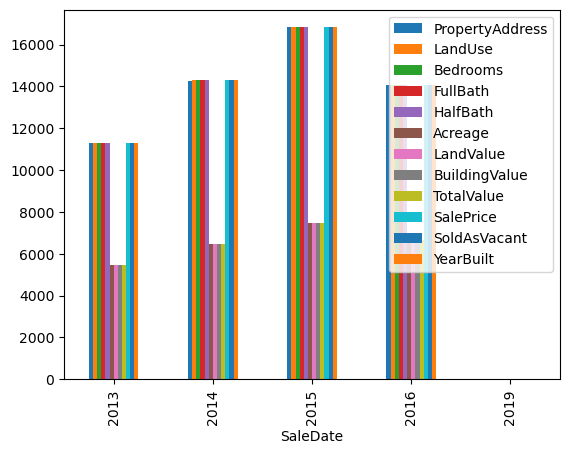

In [64]:
grouped.plot(kind='bar')

In [65]:
df['LandUse'].replace({'VACANT RESIENTIAL LAND':'VACANT RESIDENTIAL LAND'},inplace=True)

In [66]:
len(df['LandUse'].unique())

38

## Q4: Was there a circumstance when the 'total price' is greater than the 'sale price' of a property??

## Answer : Yes,about 6427 properties ,meaning that certain losses were incurred OR 

In [67]:
df[df['TotalValue']>df['SalePrice']]

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate
6,"2005 SADIE LN, GOODLETTSVILLE",SINGLE FAMILY,3,2,0,1.03,40000.0,137900.0,177900.0,171000.0,No,1976,2014
13,"629 GAYLEMORE DR, GOODLETTSVILLE",SINGLE FAMILY,4,4,0,1.07,40000.0,203600.0,243600.0,189900.0,No,2006,2013
21,"2034 GRACELAND DR, GOODLETTSVILLE",SINGLE FAMILY,5,4,1,2.61,52900.0,330700.0,383600.0,379900.0,No,1997,2016
22,"811 BENTON CT, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,1.10,40000.0,158000.0,198000.0,192500.0,No,1989,2013
26,"8154 OLD SPRINGFIELD PIKE, GOODLETTSVILLE",SINGLE FAMILY,2,1,1,2.31,50000.0,119300.0,179200.0,162500.0,No,1986,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54090,"5032 SUNSHINE DR, ANTIOCH",SINGLE FAMILY,3,2,0,0.25,25000.0,140600.0,165600.0,150000.0,No,1997,2013
54210,"6640 HOLT RD, NASHVILLE",SINGLE FAMILY,4,2,0,3.00,111000.0,155800.0,268000.0,258000.0,No,1978,2016
54212,"6635 HOLT RD, NASHVILLE",SINGLE FAMILY,3,2,0,3.03,111500.0,210400.0,321900.0,230000.0,No,1980,2014
54394,"6079 CULBERTSON RD, ANTIOCH",VACANT RESIDENTIAL LAND,0,0,0,10.80,216000.0,0.0,216000.0,200000.0,Yes,0,2016


#### Q6.. What is the difference between 'the year the property was built ' and 'the year the property was sold'??

In [68]:
df['year_diff'] = df['SaleDate'] - df['YearBuilt']

In [69]:
df.head()

,PropertyAddress,LandUse,Bedrooms,FullBath,HalfBath,Acreage,LandValue,BuildingValue,TotalValue,SalePrice,SoldAsVacant,YearBuilt,SaleDate,year_diff
0,"1808 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.3,50000.0,168200.0,235700.0,240000.0,No,1986,2013,27
1,"1832 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,2,3.5,50000.0,264100.0,319000.0,366000.0,No,1998,2014,16
2,"1864 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.9,50000.0,216200.0,298000.0,435000.0,No,1987,2016,29
3,"1853 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,3,3,0,2.6,50000.0,147300.0,197300.0,255000.0,No,1985,2016,31
4,"1829 FOX CHASE DR, GOODLETTSVILLE",SINGLE FAMILY,4,3,0,2.0,50000.0,152300.0,202300.0,278000.0,No,1984,2014,30
